In [ ]:
import pandas as pd

# 1 Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/bank .csv')

# 2 Check the DataFrame info and identify columns with dtype=object
print("DataFrame Info:")
df_info = df.info()

# (a) Identify columns with dtype=object
object_columns = df.select_dtypes(include=['object']).columns
print("\nColumns with dtype 'object':")
print(object_columns)

# (b) Find the unique values of those columns
for col in object_columns:
    unique_vals = df[col].unique()
    print(f"\nUnique values in {col}:")
    print(unique_vals)

# (c) Check for null values in each column
null_values = df.isnull().sum()
print("\nNull values in each column:")
print(null_values)

# 3 Drop columns with dtype=object and create a new DataFrame with numeric columns
df_numeric = df.drop(columns=object_columns)

# Write the new DataFrame to a CSV file
df_numeric.to_csv('banknumericdata.csv', index=False)

# 4 Read the new 'banknumericdata.csv' file and get summary statistics
df_numeric_read = pd.read_csv('banknumericdata.csv')
print("\nSummary statistics of numeric columns:")
print(df_numeric_read.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with dtype 'object':
Index(['job', 'marital', 'education', 'default', 'hou

In [ ]:
import pandas as pd

# 1. Load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')

# 2. Create a DataFrame subset with the required columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# 3. Filter the data to include only rows where Pclass = 1 (first-class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]

# 4. Check for null values in the 'Age' column
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_age_count}")

# 5. Drop rows with null values in the 'Age' column
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])

# Verify the number of null values after dropping
null_age_count_after_drop = first_class_df_cleaned['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column after dropping: {null_age_count_after_drop}")


Number of null values in the 'Age' column: 30
Number of null values in the 'Age' column after dropping: 0


In [ ]:
import pandas as pd

#  Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/medical_students_dataset.csv')

#  Check the DataFrame info and identify columns with missing values
print("DataFrame Info:")
df_info = df.info()

# Identify columns with missing (null) values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

#  Impute the missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            # If the column is categorical (object), fill missing values with the mode (most frequent value)
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
            print(f"\nMissing values in column '{column}' were filled with the mode value: {mode_value}")
        else:
            # If the column is numerical, fill missing values with the mean or median
            # Let's use the median to avoid outliers' influence
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
            print(f"\nMissing values in column '{column}' were filled with the median value: {median_value}")

#  Check for any duplicate values and manage them
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("\nDuplicates have been removed.")

# After handling missing values and duplicates, let's check the final info
print("\nFinal DataFrame Info after imputations and handling duplicates:")
df_info_after = df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
We

<ipython-input-8-7f17561a9126>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
<ipython-input-8-7f17561a9126>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '


Missing values in column 'Cholesterol' were filled with the median value: 184.0

Missing values in column 'Diabetes' were filled with the mode value: No

Missing values in column 'Smoking' were filled with the mode value: No

Number of duplicate rows: 12879

Duplicates have been removed.

Final DataFrame Info after imputations and handling duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 187121 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      187121 non-null  float64
 1   Age             187121 non-null  float64
 2   Gender          187121 non-null  object 
 3   Height          187121 non-null  float64
 4   Weight          187121 non-null  float64
 5   Blood Type      187121 non-null  object 
 6   BMI             187121 non-null  float64
 7   Temperature     187121 non-null  float64
 8   Heart Rate      187121 non-null  float64
 9   Blood Pressure  187121 non-n

In [ ]:
import pandas as pd

# 1. Load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')

# 2. Use one-hot encoding to convert the 'Embarked' column into separate binary columns
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 3. Add the new binary columns to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# 4. Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# 5. Print the first few rows of the modified DataFrame to verify the changes
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


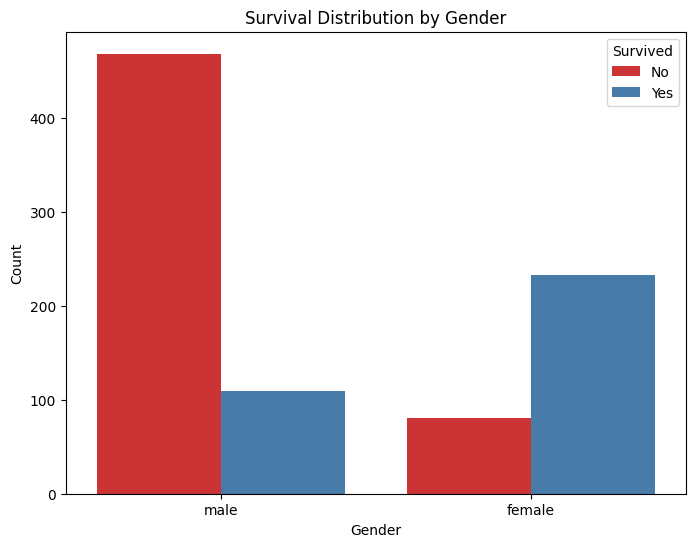

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')

# 2. Calculate the mean survival rates for each gender (grouped by 'Sex')
mean_survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(mean_survival_rate_by_sex)

# 3. Create a visualization of the survival distribution by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


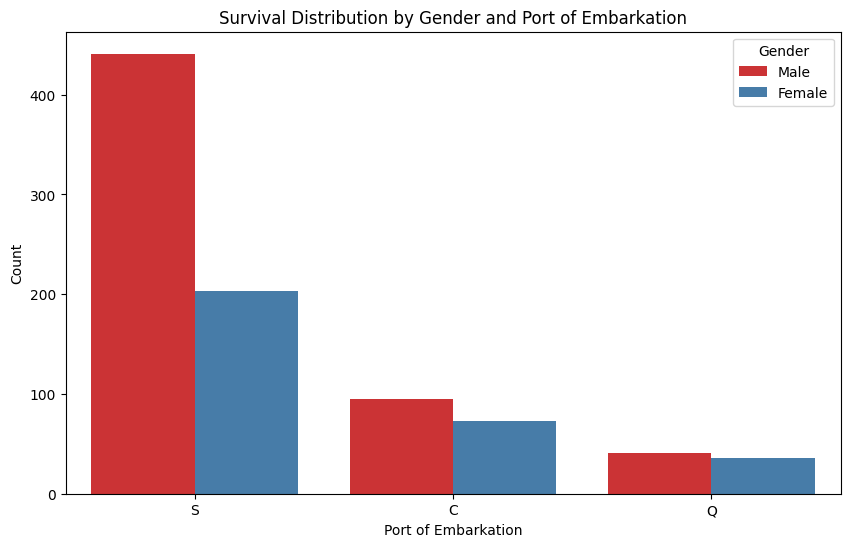

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')

# 2. Filter the data to include only the ports 'C', 'Q', 'S'
df_filtered = df[df['Embarked'].isin(['C', 'Q', 'S'])]

# 3. Create a count plot to show the survival distribution by gender and port of embarkation
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Embarked', hue='Sex', palette='Set1', hue_order=['male', 'female'])
plt.title('Survival Distribution by Gender and Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')

# 2. Divide the 'Age' column into five quantiles
df['Age Group'] = pd.qcut(df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# 3. Calculate the mean survival rate ('Survived') for each combination of Pclass and Age Group
mean_survival_by_class_age = df.groupby(['Pclass', 'Age Group'])['Survived'].mean().reset_index()

# 4. Create a visualization to show the survival rates by Pclass and Age Group
plt.figure(figsize=(10, 6))
sns.heatmap(mean_survival_by_class_age.pivot('Age Group', 'Pclass', 'Survived'), annot=True, cmap='YlGnBu', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rates by Age Group and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age Group')
plt.show()


<ipython-input-5-c35a31c49ebe>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival_by_class_age = df.groupby(['Pclass', 'Age Group'])['Survived'].mean().reset_index()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

<Figure size 1000x600 with 0 Axes>